In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, ConfusionMatrixDisplay , accuracy_score,confusion_matrix

# --version 
# tf 2,13.0  CUDA: 11.8 python 3.8.19

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
tf.test.is_built_with_cuda()

True

In [26]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [27]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])


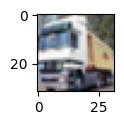

In [29]:
plot_sample(1)

In [30]:
y_train[0]

array([6], dtype=uint8)

In [31]:
classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# to get the label
classes[y_train[3][0]]

'deer'

In [32]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [33]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [34]:
# doing one hot encoding    
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [36]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [37]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),  # it will flatten automatically for each row
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs=50)

2024-04-05 17:42:06.115321: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8339 - accuracy: 0.3490
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6522 - accuracy: 0.4223
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5755 - accuracy: 0.4503
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5219 - accuracy: 0.4673
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4772 - accuracy: 0.4836
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4419 - accuracy: 0.4983
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4059 - accuracy: 0.5102
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3788 - accuracy: 0.5217
Epoch 9/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3506 - accuracy: 0.5304
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.326

In [38]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 1ms/step


'cat'

In [39]:
classes[y_test[0][0]]

'cat'

In [40]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 1.3105 - accuracy: 0.5599


[1.3104628324508667, 0.5598999857902527]

In [51]:
# test_labels=classes(y_test)
# print(test_labels)
test_labels = [classes[label[0]] for label in y_test]
print(predicted_labels)

[3 8 0 ... 5 2 5]


313/313 [==============================] - 0s 1ms/step
Accuracy: 0.5599


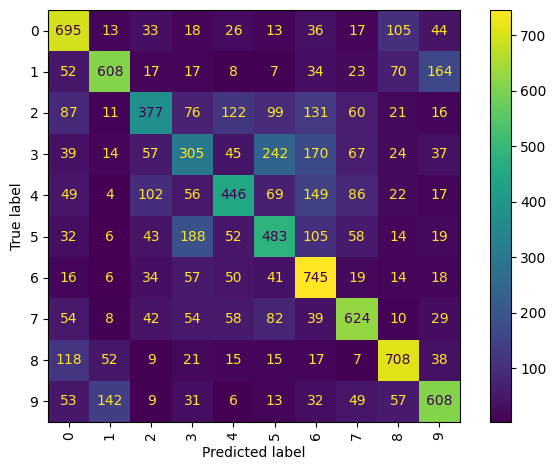

In [56]:
predictions=model.predict(X_test_scaled)
predicted_labels=np.argmax(predictions,axis=1)
predict_classes=[classes[label]for label in predicted_labels]
test_labels = [classes[label[0]] for label in y_test]

accuracy = accuracy_score(test_labels, predict_classes)

print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(test_labels, predict_classes)

disp=ConfusionMatrixDisplay(
    conf_matrix
)
disp.plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [16]:
def get_model():
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid'),
    ])

    model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

    return model


This is where the diff will be created

In [17]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

2024-04-05 17:16:08.679763: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-04-05 17:16:11.642817: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7b7038012bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-04-05 17:16:11.642933: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


   3/1563 [..............................] - ETA: 1:47 - loss: 2.3789 - accuracy: 0.1458

2024-04-05 17:16:12.071034: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 88s 56ms/step - loss: 1.8160 - accuracy: 0.3542
1min 33s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [18]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model=get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

2024-04-05 17:21:29.224821: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-04-05 17:21:30.763564: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-04-05 17:21:32.308017: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7b7044209ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-05 17:21:32.308164: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-04-05 17:21:32.371925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


1563/1563 [==============================] - 10s 5ms/step - loss: 1.8119 - accuracy: 0.3537
21.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Test the below If you have gpu dedicated to dl

In [21]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical,epochs=10)

2024-04-05 17:33:40.820345: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
 882/1563 [===============>..............] - ETA: 38s - loss: 1.8782 - accuracy: 0.3255

KeyboardInterrupt: 

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model=get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical,epochs=10)